In [2]:
import pandas as pd
import numpy as np
import pylab as pl
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
df =pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

In [7]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [8]:
df.columns = ["admit","gre","gpa","usha"]
df.head()
df.shape

(400, 4)

In [11]:
pd.crosstab(df["admit"],["usha"], rownames=["admit"])

col_0,usha
admit,
0,273
1,127


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f43b6f06048>,
      dtype=object)

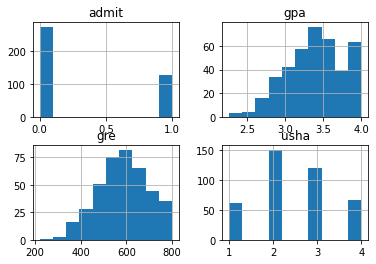

In [12]:
df.hist()

In [14]:
dummy_ranks = pd.get_dummies(df["usha"],prefix="usha")

In [16]:
dummy_ranks.head()

,usha_1,usha_2,usha_3,usha_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [18]:
cols_to_keep =["admit","gre","gpa"]
data =df[cols_to_keep].join(dummy_ranks.loc[:,"usha_2":])
data.head()

,admit,gre,gpa,usha_2,usha_3,usha_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [19]:
data["intercept"] = 1.0
data.head()

,admit,gre,gpa,usha_2,usha_3,usha_4,intercept
0,0,380,3.61,0,1,0,1.0
1,1,660,3.67,0,1,0,1.0
2,1,800,4.00,0,0,0,1.0
3,1,640,3.19,0,0,1,1.0
4,0,520,2.93,0,0,1,1.0


In [20]:
train_cols = data.columns[1:]

logit =sm.Logit(data["admit"],data[train_cols])

In [21]:
results =logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [22]:
ironman =results.predict([800,4,0,0,0,1.0])

In [23]:
print(ironman)

[0.73840825]


In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Mon, 21 Sep 2020   Pseudo R-squ.:                 0.08292
Time:                        05:06:37   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
Covariance Type:            nonrobust   LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
usha_2        -0.6754      0.316     -2.134      0.033      -1.296      -0.055
usha_3        -1.3402      0.345     -3.881      0.000      -2.017      -0.663
usha_4        -1.5515      0.418     -3.713      0.000      -2.370      -0.733
intercept     -3.9900      1.140     -3.500      0.000      -6.224      -1.756
==============================================================================
"""